<a href="https://colab.research.google.com/github/xSupernovaa/NLP-Topic-Modelling/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports & Data Reading

In [2]:
# Data loading
from google.colab import drive
import zipfile
import pandas as pd
import gdown

# EDA
import matplotlib.pyplot as plt
import seaborn as sns


# Util
from tqdm import tqdm
from pprint import pprint


import calendar

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
DATA_URL = "https://drive.google.com/file/d/10YvMpIzRSi_GXg91TkrQBL_3JKC5dni7/view?usp=sharing"

In [5]:
gdown.download(DATA_URL, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=10YvMpIzRSi_GXg91TkrQBL_3JKC5dni7
To: /content/articles1.csv.zip
100%|██████████| 77.4M/77.4M [00:00<00:00, 90.6MB/s]


'articles1.csv.zip'

In [6]:
DATA_PATH = "articles1.csv.zip"

In [7]:
# Extract the CSV file from the zip archive
with zipfile.ZipFile(DATA_PATH, "r") as zip_ref:
    zip_ref.extractall()

# Load the CSV data into a Pandas DataFrame
df = pd.read_csv("articles1.csv")

In [8]:
df.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


# EDA

In [9]:

sns.set_style("darkgrid")

Let's start by dropping unimportant columns

In [10]:

df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [11]:
print("Null values count: ")
df.isnull().sum()

Null values count: 


id                 0
title              0
publication        0
author          6306
date               0
year               0
month              0
url            50000
content            0
dtype: int64

all data is missing their `url`, some of them are missing their `author` 

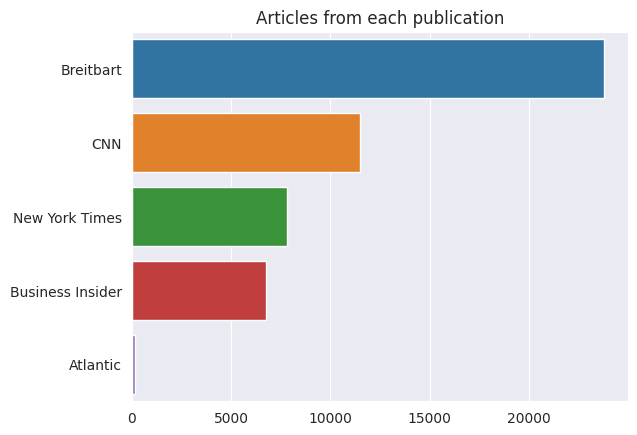

In [12]:
value_counts = df['publication'].value_counts()
sns.barplot(x=value_counts.values, y=value_counts.index)
plt.title("Articles from each publication")
plt.show()

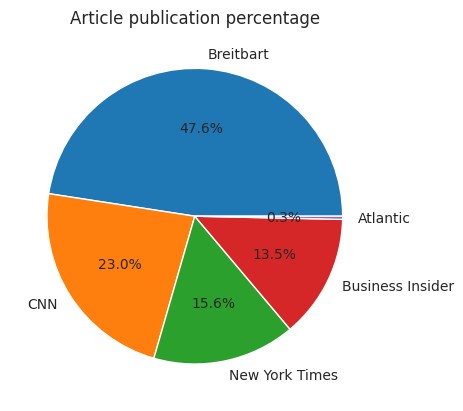

In [13]:
plt.pie(df['publication'].value_counts(normalize=True), labels=value_counts.index, autopct='%1.1f%%')
plt.title("Article publication percentage")
plt.show()

In [14]:
df['year'].value_counts()

2016.0    28451
2017.0    17908
2015.0     3326
2013.0      212
2014.0       76
2012.0       26
2011.0        1
Name: year, dtype: int64

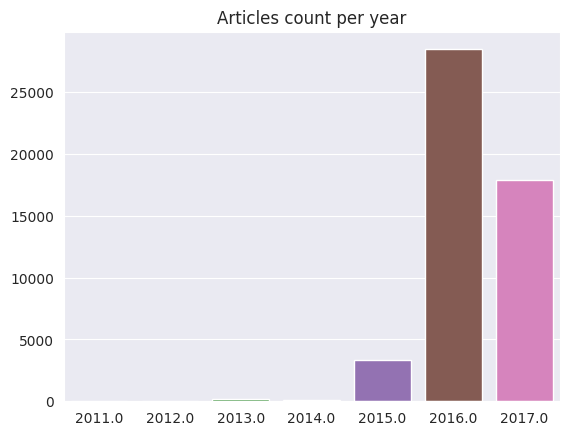

In [15]:
year_value_counts = df['year'].value_counts()
sns.barplot(x= year_value_counts.index, y= year_value_counts.values)
plt.title("Articles count per year")
plt.show()

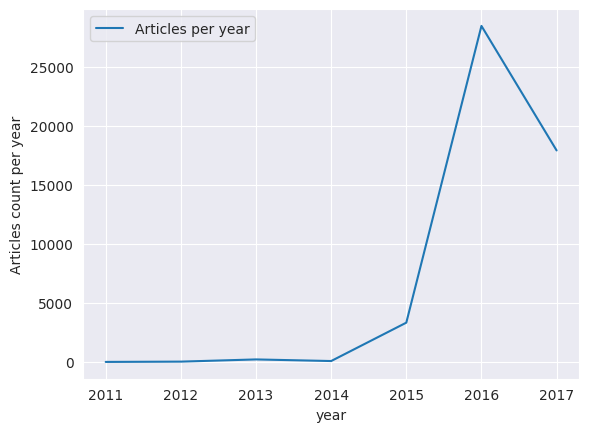

In [45]:
sns.lineplot(x= year_value_counts.index, y= year_value_counts.values, label = "Articles per year")
plt.xlabel( 'year')
plt.ylabel('Articles count per year')
plt.show()

In [17]:
df['month'].value_counts()

1.0     5905
4.0     5832
3.0     5750
2.0     5225
6.0     4959
5.0     4846
7.0     3208
8.0     3140
9.0     3002
12.0    2997
11.0    2612
10.0    2524
Name: month, dtype: int64

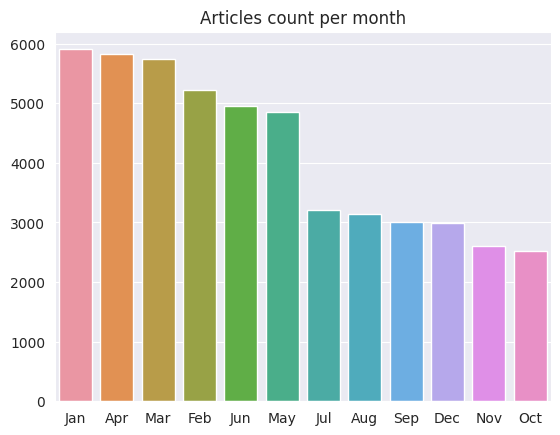

In [18]:
month_value_counts = df['month'].value_counts()
month_value_counts.index = [calendar.month_abbr[int(month)] for month in month_value_counts.index]
sns.barplot(x= month_value_counts.index, y= month_value_counts.values)
plt.title("Articles count per month")
plt.show()

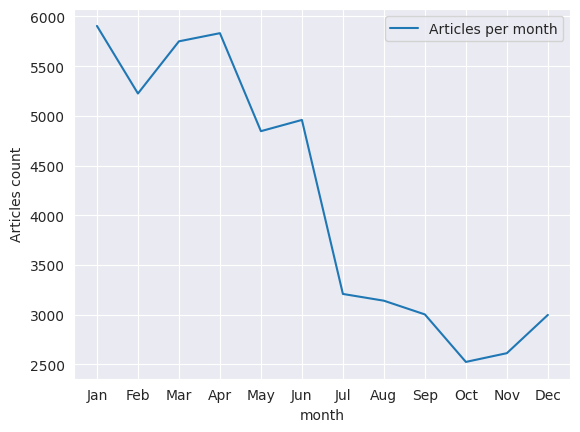

In [46]:
month_value_counts = month_value_counts.reindex(calendar.month_abbr, axis= 0)
sns.lineplot(x= month_value_counts.index, y= month_value_counts.values, label = "Articles per month")
plt.xlabel( 'month')
plt.ylabel('Articles count')
plt.show()

In [20]:
df['author'].value_counts()

Breitbart News                                                     1559
Pam Key                                                            1282
Charlie Spiering                                                    928
Jerome Hudson                                                       806
John Hayward                                                        747
                                                                   ... 
Julie Bosman and Monica Davey                                         1
Michael D. Shear, Maggie Haberman and Alan Rappeport                  1
Nicholas Fandos and Eric Lipton                                       1
Alan Rappeport, Eric Lichtblau, Maggie Haberman and Adam Liptak       1
Julia Ioffe                                                           1
Name: author, Length: 3603, dtype: int64

In [21]:
len(df['author'].value_counts().index)

3603

In [22]:
author_value_counts = df['author'].value_counts()

In [23]:
author_value_counts = author_value_counts[:10]

In [24]:
author_value_counts

Breitbart News      1559
Pam Key             1282
Charlie Spiering     928
Jerome Hudson        806
John Hayward         747
Daniel Nussbaum      735
AWR Hawkins          720
Ian Hanchett         647
Joel B. Pollak       624
Alex Swoyer          604
Name: author, dtype: int64

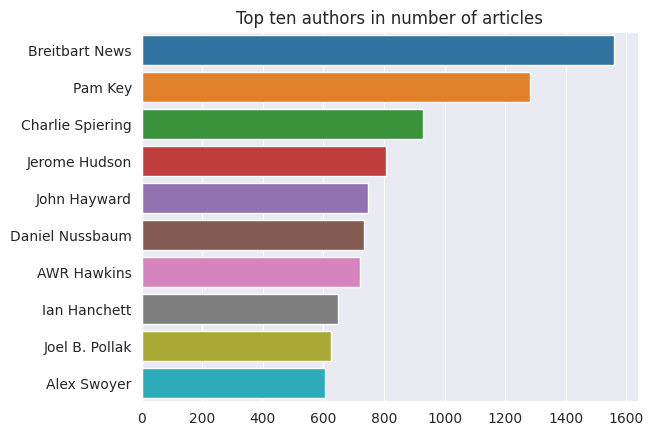

In [47]:
sns.barplot(x= author_value_counts.values, y= author_value_counts.index)
plt.title("Top ten authors in number of articles")
plt.show()

In [26]:
subset = df[['publication', 'author']]

In [34]:
subset.drop_duplicates(['author'], inplace= True)

<ipython-input-34-a59ec2a98756>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.drop_duplicates(['author'], inplace= True)


In [37]:
authors_per_publication = subset.publication.value_counts()

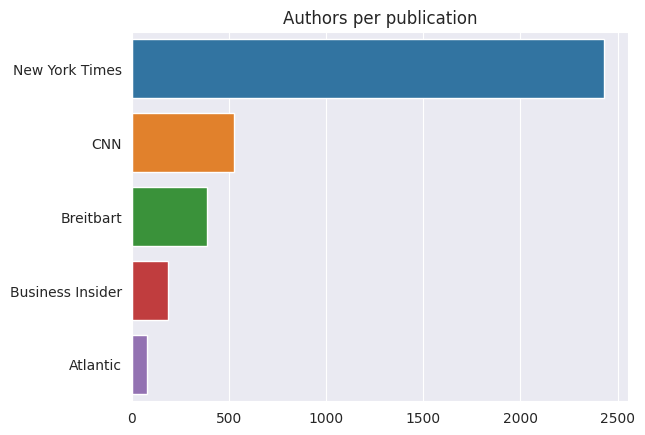

In [38]:
sns.barplot(x=authors_per_publication.values, y=authors_per_publication.index)
plt.title("Authors per publication")
plt.show()

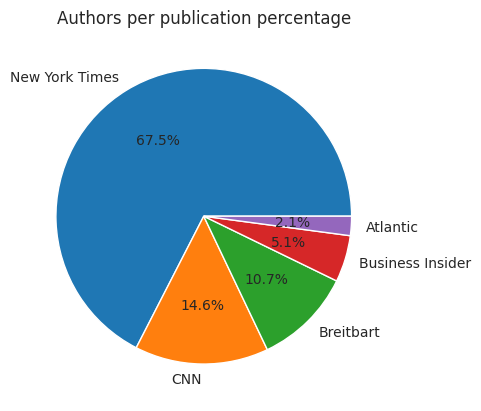

In [44]:
plt.pie(subset['publication'].value_counts(normalize=True), labels=authors_per_publication.index, autopct='%1.1f%%')
plt.title("Authors per publication percentage")
plt.show()